<a href="https://colab.research.google.com/github/kostakomanovic/MinifigureClassification/blob/main/Minifigure_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sadržaj**
1. Uvod
2. Objašnjenje zadatka
3. Realizacija zadatka
4. Zaključak

**Uvod**

Klasifikacija je zadatak nadgledanog mašinskog učenja čiji je cilj predvidjeti klasne oznake novih instanci na osnovu ranijih opažanja.Znači, obučavamo model koristeći trening podatake i tako obučen model koristimo za predviđanje novih, do tada neviđenih podataka. Termin „nadgledano učenje“ odnosi se na skup trening primera (ulaznih podataka) gde su signali željenog izlaza (oznake) već poznati.

Primer klasifikacije sa kojim se susrećemo u svakodnevnom životu jeste sistem elektronske pošte koji ima mogućnost automatskog otkrivanja neželjenih poruka. To znači da sistem analizira sve dolazne poruke i označava ih kao spam ili ne-spam, čak i mi, kao krajnji korisnici, imamo mogućnost da ručno označimo poruke kao neželjene, kako bismo poboljšali sposobnost otkrivanja spam-a.

Ovaj primer klasifikacije spada u binarnu klasifikaciju jer postoje samo dve klase 'spam' i 'nije spam', a pored nje imamo jos tri vrste klasfikacije: 'Multi-Class' kada postoje više od dve klase, 'Multi-Label' kada jedan objekat pripada jednoj ili više klasa i 'Unbalanced' kada je broj primera u svakoj klasi nejednako raspoređen.

Klasifikacija fotografija predstavlja dodjeljivanje najvjerovatnije kategorije kojoj pripada fotogafija iz nekog skupa fiksnih kategorija.

Postoje dva tipa klasifikatora fotografija:

    1. prvi tip je klasfikacija pomoću karakteristika koje su uočene na fotografijama
    2. drugi tip je kada se duboka neuronska mreža obučava za klasifikovanje fotografija
     

Klasifikacija fotografija sastoji se od dvije faze:

    1. treniranje-algoritmu za klasifikaciju se pružaju ulazi za koje je poznata oznaka klase i koristeći te ulaze obučava se model
    2. testiranje-kada je završen trening, naučeni model se koristi za predviđanje klasa novih, do tada neviđenih ulaza


**Objašnjenje zadatka**

Osnovna ideja zadatka jeste da se na osnovu fotografija i njihovih karakteristika kreira model koje će prepozna koja se minifigura nalazi na prosledjenoj slici.
Set podataka se sastoji od 386 fotografija za obuku u 70 fotografija za testiranje.
Zadatak sadrži osam fajlova:


*   harry-poter - u ovom fajlu se nalaze fotografije
*   jurassic-world - u ovom fajlu se nalaze fotografije
*   marvel - u ovom fajlu se nalaze fotografije
*   star-wars - u ovom fajlu se nalaze fotografije
*   test - u ovom fajlu se nalaze fotografije
*   index.csv - u ovom fajlu se nalaze nazivi fotografija i u drugoj koloni njihovi class_id
*   test.csv - u ovom fajlu se nalaze nazivi test slika i njihovi class_id
*   metadata.csv - u ovom fajlu se nalaze četiri kolone:


  1.   class_id - predstavlja id fotografije
  2.   lego_ids - predstavlja lego id
  3.   lego_names - predstavlja lego imena
  4.   minifigure_name - predstavlja ime minifigura









**Realizacija zadatka**

Na samom početku, imporotvane su dve biblioteke koje će biti neophodne za nastavak projekta:

    

*   NumPy (Numerical Python) je Pajtonova biblioteka otvorenog koda koja predstavlja univerzalni standard za rad sa numeričkim podacima u Pajtonu. Biblioteka sadrži višedimenzionalne nizove podataka i matrice i omogućava izvođenje matematičkih operacija nad njima. NumPy garantuje efikasne proračune i isporučuje ogromnu biblioteku matematičkih funkcija na visokom nivou.
*   Pandas je biblioteka napisana za Pajton kako bi omogućila manipulaciju podacima i analizu istih. Pandas omogućava importovanje podataka u različitim formatima kao što su CSV, JSON, SQL, Excel. Takođe, omogućava i različite manipulacije podacima kao što su spajanje, selektovanje, promena oblika, čišćenje podataka.




In [1]:
import pandas as pd
import numpy as np

Sledeći korak jeste povezivanje Google Colab-a sa Google Drive-om kako bi se omogućilo importovanje fajlova koji su dobijeni u sklopu projektnog zadatka.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dobijeni fajlovi su zapakovani pa je neophodno izvršiti njihovo raspakivanje korištenjem komande '!unzip' u nastavku.

In [3]:
!unzip /content/drive/MyDrive/#1.zip

Archive:  /content/drive/MyDrive/#1.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-p

Nakon što je Google Colab povezan sa Google Drive-om, vrši se importovanje podataka koji se nalaze u fajlu 'index.csv' koristeći biblioteku Pandas čiji opis se nalazi na samom početku. Importovanje podataka se realizuje korišćenjem komande 'read_csv' iz prethodno pomenute biblioteke. 

Nakon toga vrši se prikaz prvih deset redova tabele u koju su učitani podatci.

In [4]:
data = pd.read_csv('/content/index.csv')
data.head(10)

,path,class_id
0,marvel/0001/001.jpg,1
1,marvel/0001/002.jpg,1
2,marvel/0001/003.jpg,1
3,marvel/0001/004.jpg,1
4,marvel/0001/005.jpg,1
5,marvel/0001/006.jpg,1
6,marvel/0001/007.jpg,1
7,marvel/0001/008.jpg,1
8,marvel/0001/009.jpg,1
9,marvel/0001/010.jpg,1


U ovom koraku pozivamo funkciju shape koja nam vraća koliko kolona i redova ima tabela sa učitanim podatcima.

In [5]:
data.shape

(342, 2)

U ovom koraku je korišćena funkcija value_counts() koja nam vraća class_id slika koje se najčešće javljaju i u drugoj koloni broj ponavljanja tih slika. Vrednosti su poredjane u opadajućem redosledu. Ova funkcija isključuje nulte vrednosti što znači da ako ih imamo neće ući u rezultat prebrojavanja. Vidimo da se ovde javlja problem kada imamo nulte vrednosti ali u nekom od prethodnih koraka smo utvrdili da mi nemamo nultih vrednosti tako da možemo da koristimo ovu funkciju bez problema.

In [6]:
data['class_id'].value_counts()

5     12
6     12
7     12
27    12
26    12
9     12
18    11
20    11
8     11
19    11
22    11
21    11
2     10
3     10
4     10
1     10
23    10
31    10
30    10
29    10
28    10
25    10
24    10
34     9
35     9
15     8
16     8
17     8
32     8
33     8
10     8
11     7
12     7
13     7
14     7
Name: class_id, dtype: int64

U ovoj liniji koda proveravamo da li imamo nulte vrednosti i to radimo pomoću funkcije isnull() i funkcije sum koja će nam prebrojati koliko ima nultih vrednosti.
U rezultatu vidimo da nemamo nultih vrednosti što je dobar preduslov za dalji rad.

In [7]:
data.isnull().sum()

path        0
class_id    0
dtype: int64

Matplotlib je bliblioteka koja se koristi za vizuelizaciju podataka i grafičko crtanje.

In [8]:
import cv2
import matplotlib.pyplot as plt

U ovom koraku pomoću funkcije imread čitamo slike iz datoteke i smeštamo u niz. Takodje u funkciji imread koristimo funkciju str koja ima za parametar putanju do datoteke i koja pretvara navedenu vrednost u niz. Nakom toga koristimo funkciju array koja će od img da napravi niz. Na kraju pomoću funkcije print ispisujemo taj niz i pozivamo break da bi smo izašli iz for petlje.

In [9]:
for path in data['path']:
    img = cv2.imread(str('/content'+'/'+path))
    #plt.imshow(img)
    print(np.array(img))
    print(np.array(img)/255)
    break

[[[ 68  85  94]
  [ 68  85  94]
  [ 70  87  96]
  ...
  [123 140 143]
  [121 138 141]
  [120 137 140]]

 [[ 71  89  96]
  [ 71  89  96]
  [ 73  90  99]
  ...
  [124 141 144]
  [123 140 143]
  [123 140 143]]

 [[ 76  94 101]
  [ 75  93 100]
  [ 78  95 104]
  ...
  [125 142 145]
  [125 142 145]
  [125 142 145]]

 ...

 [[ 60  70  80]
  [ 51  61  71]
  [ 47  58  66]
  ...
  [120 132 134]
  [126 139 141]
  [117 130 132]]

 [[ 56  66  76]
  [ 46  56  66]
  [ 42  53  61]
  ...
  [121 134 136]
  [117 130 132]
  [121 134 136]]

 [[ 49  59  69]
  [ 43  53  63]
  [ 46  57  65]
  ...
  [113 126 128]
  [116 128 132]
  [118 130 134]]]
[[[0.26666667 0.33333333 0.36862745]
  [0.26666667 0.33333333 0.36862745]
  [0.2745098  0.34117647 0.37647059]
  ...
  [0.48235294 0.54901961 0.56078431]
  [0.4745098  0.54117647 0.55294118]
  [0.47058824 0.5372549  0.54901961]]

 [[0.27843137 0.34901961 0.37647059]
  [0.27843137 0.34901961 0.37647059]
  [0.28627451 0.35294118 0.38823529]
  ...
  [0.48627451 0.5529411

Na samom početku smo napravili dve liste X i Y.
U ovom koraku koristimo novu funkciju resize koja se koristi za promenu veličine niza. Ona kao parametre prima učitani niz i novu veličinu. Nakom toga pravimo niz scaled_img koji skaliramo za 255. Sledeći korak jeste pomoću funkcije append da se dodaju elementi skaliranog niza scaled_img u listu X. Elementi se pomoću ove funkcije dodaju na kraj liste. Poslednji korak koji je ovde uradjen jeste da u listu Y dodamo sve class_id iz fajla index.csv umanjene za 1.

In [10]:
X = []
y = []

for path in data['path']:
    img = cv2.imread(str('/content'+'/'+path))
    #print(img)
    resized_img = cv2.resize(img,(224,224))
    #print(resized_img)
    scaled_img = np.array(resized_img)/255
    X.append(scaled_img)
    
y = np.array(data['class_id'])-1

U ovom koraku smo samo od listi X i Y napravili nizove X i Y pomoću funkcije array koja je ranije objašnjena.

In [11]:
X = np.array(X)
y = np.array(y)

Ovde smo samo ispisali nulti element niza X.

In [12]:
X[0]

array([[[0.2745098 , 0.34117647, 0.37254902],
        [0.28235294, 0.34901961, 0.38823529],
        [0.28235294, 0.34901961, 0.38431373],
        ...,
        [0.48235294, 0.54901961, 0.56078431],
        [0.48235294, 0.54901961, 0.56470588],
        [0.47843137, 0.54509804, 0.55686275]],

       [[0.29411765, 0.36470588, 0.39215686],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30980392, 0.37647059, 0.41176471],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.49411765, 0.56078431, 0.57254902],
        [0.49019608, 0.55686275, 0.56862745]],

       [[0.32156863, 0.39215686, 0.41960784],
        [0.31372549, 0.38431373, 0.41176471],
        [0.30588235, 0.37647059, 0.40392157],
        ...,
        [0.48627451, 0.55294118, 0.56470588],
        [0.50196078, 0.56862745, 0.58039216],
        [0.49019608, 0.55686275, 0.56862745]],

       ...,

       [[0.23529412, 0.27058824, 0.30980392],
        [0.2627451 , 0.29803922, 0.3372549 ],
        [0.23921569, 0

Ovde koristimo novu funkciju train_test_split koja potpada pod sklearn-ovu funkciju model_selection i olakšava odvajanje skupa podataka o obuci za obučavanje našeg modela mašinskog učenja i drugog skupa podataka za testiranje da bi smo proverili da li je naše predvidjanje bilzu ili ne.

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0)

U ovom koraku samo ispisujemo kolika je veličina trening skupa i kolika je veličina test skupa.

In [14]:
print(f'train size : {x_train.shape}')
print(f'test size : {x_test.shape}')

train size : (256, 224, 224, 3)
test size : (86, 224, 224, 3)


Ovde koristimo novu biblioteku tensorflow koja je biblioteka otvorenog koda za mašinsko učenje. TensorFlow se sastoji od API-ja visokog nivoa i API-ja niskog nivoa. API visokog nivoa pruža više funkcija unutar jedne komande u poredjenju sa API-jem niskog nivoa, ali API niskog nivoa omogućava korisniku detaljniju kontrolu za upravljanje funkcijama. Funkcije layers i sequential se koriste za kreiranje sekvencijalnog modela.

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential

Ovde pomoću funkcije randomFlip svaku sliku okrenemo horizontalno. Toj funkciji prosledjujemo i input_shape što predstavlja ulazni oblik odnsono veličinu slike. Sledeći korak jeste da pomoću funkcije randomRotatin nasumično rotiramo svaku sliku za 0.1. I poslednji korak ovde jeste da svaku sliku nasumično zumirano za 0.1 pomoću funkcije randomZoom.

In [16]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

U ovom koraku ćemo pomoću funkcije len prebrojati koliko ukupno ima class_id-ja i koliko ima jedinstevnih class_id što se dobija pomoću funkcije unique.

In [17]:
print(len(data['class_id'].value_counts()))
print(len(data['class_id'].unique()))

35
35


Ovde taj broj class_id-ja koji nam vrati len funkcija smeštamo u promenljivu num_classes.

In [18]:
num_classes = len(data['class_id'].value_counts())

Ovde pravimo model. Prvo dodajemo data_augmentation koji smo u nekom prethodnom koraku napravili. Funkcija conv2D se koristi za implementaciju 2-D sloja konvolucije. Ova funkcija za ulaz uzima 2-D matricu slika i obezbedjuje tenzor izlaz. Funkcija maxPooling2D smanjuje uzorke unosa prema njegovim prostornim dimenzijama(visina i širin) za svaki kanal ulaza. Funkcija Flatten poravnava ulaz i ne utiče na veličinu serije. Dense je zapravo gusto povezan sloj. Dense izvodi operacije na ulazu i vraća izlaz. Parametar ove metode activation nam postavlja funkciju aktiviranja na relu.

In [19]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes),
])

Funkcija compile postavlja argumente koje prosledjujemo. Argument loss je funkcija gubitka. Argument optimizer je oprimizator. Argument metrics je metrika. SparseCategoricalCrossentropy je retka kategorička ukrštena kontrola koja se koristi za izračunavanje gubitka neuronske mreže.

In [20]:
model.compile(
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer = 'adam',
metrics = ['accuracy'],
)

Ovde koristimo fit funkciju koja se koristi za obuku modela. Parametar x_train je skup podataka za obuku. Parametar y_train je skup oznaka za sve podatke iz x_train. Parametar y_test je skup oznaka za sve podatke iz x_test. Parametar x_test je skup podataka za testiranje. Parametar epochs predstavlja broj ponavljanja po nizovima podataka za obuku. Parametar verbose nam postavlja režim detaljnosti i može se postaviti na 0,1 ili 2. Režim detaljnosti 2 je jedna linija dnevnika po epohi.

In [21]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=2)

Epoch 1/50
8/8 - 28s - loss: 3.6622 - accuracy: 0.0352 - val_loss: 3.5725 - val_accuracy: 0.0116
Epoch 2/50
8/8 - 25s - loss: 3.5252 - accuracy: 0.0391 - val_loss: 3.5844 - val_accuracy: 0.0349
Epoch 3/50
8/8 - 25s - loss: 3.4901 - accuracy: 0.0508 - val_loss: 3.5563 - val_accuracy: 0.0233
Epoch 4/50
8/8 - 25s - loss: 3.4915 - accuracy: 0.0547 - val_loss: 3.5396 - val_accuracy: 0.0116
Epoch 5/50
8/8 - 25s - loss: 3.4233 - accuracy: 0.0898 - val_loss: 3.5005 - val_accuracy: 0.0233
Epoch 6/50
8/8 - 25s - loss: 3.2525 - accuracy: 0.1133 - val_loss: 3.5346 - val_accuracy: 0.0465
Epoch 7/50
8/8 - 25s - loss: 2.9518 - accuracy: 0.1836 - val_loss: 3.4771 - val_accuracy: 0.1163
Epoch 8/50
8/8 - 25s - loss: 2.9272 - accuracy: 0.2461 - val_loss: 3.2458 - val_accuracy: 0.1860
Epoch 9/50
8/8 - 25s - loss: 2.6890 - accuracy: 0.2930 - val_loss: 3.0887 - val_accuracy: 0.1512
Epoch 10/50
8/8 - 25s - loss: 2.4493 - accuracy: 0.3320 - val_loss: 3.1980 - val_accuracy: 0.2093
Epoch 11/50
8/8 - 25s - loss:

U prvoj liniji ovog dela koda instantiramo arhitekturu DenseNet121. Nakon toga postavljamo bazni ulaz i bazni izlaz. Funkcija Dense izvodi operacije na ulazu i vraća izlaz. Parametar ove metode activation nam postavlja funkciju aktiviranja na softmax. Nakon toga pravimo novi model kojem prosledjujemo parametre base_input i output koje smo prethodno kreirali. I na kraju samo ispisujemo rezime novo kreiranog modela pomoću funkcije summary.

In [22]:
model_1 = tf.keras.applications.DenseNet121()
base_input = model_1.layers[0].input
base_output = model_1.layers[-2].output
output = layers.Dense(num_classes,activation='softmax')(base_output)
new_model = keras.Model(inputs = base_input,outputs = output)
print(new_model.summary())

33202176/33188688 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_____________________________

U ovom delu postavljamo prosledjene parametre na novo kreiranom modelu pomoću funkcije compile. Postavljamo parametar lose koji predstavlja funkcija gubitka, optimizer koji predstavjla optimizator i metrics koji predstavlja metriku.

In [23]:
new_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer ='adam',metrics=['accuracy'])

Zatim pomoću funkcije fit obučavamo novi model. Funkciji prosledjujemo parametre x_train što je skup podataka za obuku, y_train što je skup oznaka za sve podatke u x_train, epochs je broj ponavljanja po nizovima podataka za obuku, x_test je skup podataka za testiranje i y_test je skup oznaka za sve podatke u x_test.

In [24]:
new_model.fit(x_train,y_train,epochs = 50,validation_data=(x_test,y_test))

Epoch 1/50
8/8 [==============================] - 199s 23s/step - loss: 2.7115 - accuracy: 0.3242 - val_loss: 5.1101 - val_accuracy: 0.1512
Epoch 2/50
8/8 [==============================] - 185s 23s/step - loss: 0.4536 - accuracy: 0.9531 - val_loss: 6.1040 - val_accuracy: 0.0465
Epoch 3/50
8/8 [==============================] - 190s 24s/step - loss: 0.0852 - accuracy: 1.0000 - val_loss: 6.8450 - val_accuracy: 0.0581
Epoch 4/50
8/8 [==============================] - 185s 23s/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 6.3554 - val_accuracy: 0.0930
Epoch 5/50
8/8 [==============================] - 183s 23s/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 4.6274 - val_accuracy: 0.1163
Epoch 6/50
8/8 [==============================] - 187s 24s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.5949 - val_accuracy: 0.1744
Epoch 7/50
8/8 [==============================] - 181s 23s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.0121 - val_accuracy: 0.2326
Epoch 8/50
8/8 [====

Pomoću funkcije imread učitavamo sliku marvel/0001/001.jpg. Zatim koristimo funkciju cvtColor koja se koristi za pretvaranje slike iz jednog prostora boje u drugi. Zatim pomoću funkcije resize podešavamo veličinu slike. Sledeće što ovde radimo jeste da prikazujemo sliku pomoću funkcije imshow. Zatim pomoću funkcije reshape oblikujemo sliku bez promene podataka slike. Funkcija argmax nam vraća indeks maksimalnog elementa koje smeštamo u promenljivu ans. Zatim pomoću funkcije read_csv ućitavamo csv fajl metadata. Sledeće što radimo jeste da pronalazimo ime minifigure čiji je class_id jednak indeksu ans koji smo prethodno našli. I na kraju samo ispisujemo to ime minifigure.

minifigure name : SPIDER-MAN


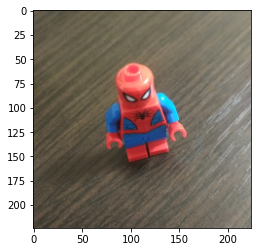

In [30]:
image = cv2.imread('/content/marvel/0001/001.jpg')
# read the image 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(224,224))/255
plt.imshow(image)
image = np.reshape(image,(1,224,224,3))
ans = new_model.predict(image).argmax()
ans = ans+1
metadata = pd.read_csv('/content/metadata.csv')
name = metadata['minifigure_name'][metadata['class_id']==ans].iloc[0]
print(f'minifigure name : {name}')

U ovom koraku vrši se importovanje podataka koji se nalaze u fajlu 'metadata.csv' koristeći biblioteku Pandas čiji opis se nalazi na samom početku. Importovanje podataka se realizuje korišćenjem komande 'read_csv' iz prethodno pomenute biblioteke. 
Nakon uspešnog importovanja podataka veši se prikaz naziva minifigure čiji je class_id 1.

In [26]:
metadata = pd.read_csv('/content/metadata.csv')
metadata['minifigure_name'][metadata['class_id']==1].iloc[0]

'SPIDER-MAN'

Komandom metadata smo prikazali ceo sadržaj koji je učitan iz fajla metadata.csv u promenljivu metadata.

In [27]:
metadata

,class_id,lego_ids,lego_names,minifigure_name
0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,5,[75208],"[""Yoda's Hut""]",YODA
5,6,[75208],"[""Yoda's Hut""]",LUKE SKYWALKER
6,7,[75208],"[""Yoda's Hut""]",R2-D2
7,8,[75199],"[""General Grievous' Combat Speeder""]",MACE WINDU
8,9,[75199],"[""General Grievous' Combat Speeder""]",GENERAL GRIEVOUS
9,10,[75264],"[""Kylo Ren's Shuttle Microfighter""]",KYLO REN


**Zaključak**

U ovom projektu smo istrenirali model na osnovu skupa podataka za obuku koji je sadržao fotografije. Na kraju smo tom modelu prosledili fotografiju iz skupa test podataka koju taj model treba da klasifikuje. Videli smo da ovaj model sa velikom verovatnoćom dobro klasifikuje fotografiju iz test skupa.